In [1]:
import pandas as pd
import seaborn as sns
import os
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
# import plot_settings
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.get_data_path()
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']= 'STIXGeneral'
mpl.rcParams['mathtext.fontset']= 'stix'
mpl.rcParams['font.size']= 24
# mpl.font_manager.rebuild()

args = dict(palette='tab10', x='')

# df = pd.read_csv('./kuramoto_linear_comparison_quantized_k10.csv')
df = pd.read_csv('../kuramoto_linear_comparison_quantized.csv')
# df['Sync Frequency ($\\tau^{-1}$)'] = df['Epoch ($\\tau$)']
df['graph'] = df['graph'].str.extract(r'/([\w\d]+)$')
df['Precision'] = df['bits'].astype(str) + 'b'
df['Precision'] = df['Precision'].replace({'0b': "Full"})
df['solver'] = df['solver'].replace({'brim': "Linear", 'kuramoto': 'Kuramoto'})
# df['Epoch ($\\tau$)'] = df['epoch']
df = df.rename(columns={'epoch':"Epoch ($\\tau$)", 'cut':"Cut"})
bks_df = pd.read_csv(os.environ['GSET']+'/bks/set_summary.csv')
df = df.merge(bks_df, on='graph')
df['R'] = df['Cut'] / df['BKS']
df['InvR'] = 1-df['R']
df['Device Model'] = df['solver']
df['Subsystems'] = df['blocks']
# for graph, lim_df in df.groupby('graph'):
#     for 

/tmp/ipykernel_453651/4109136167.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticklabels()])
/tmp/ipykernel_453651/4109136167.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticklabels()])
/tmp/ipykernel_453651/4109136167.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticklabels()])


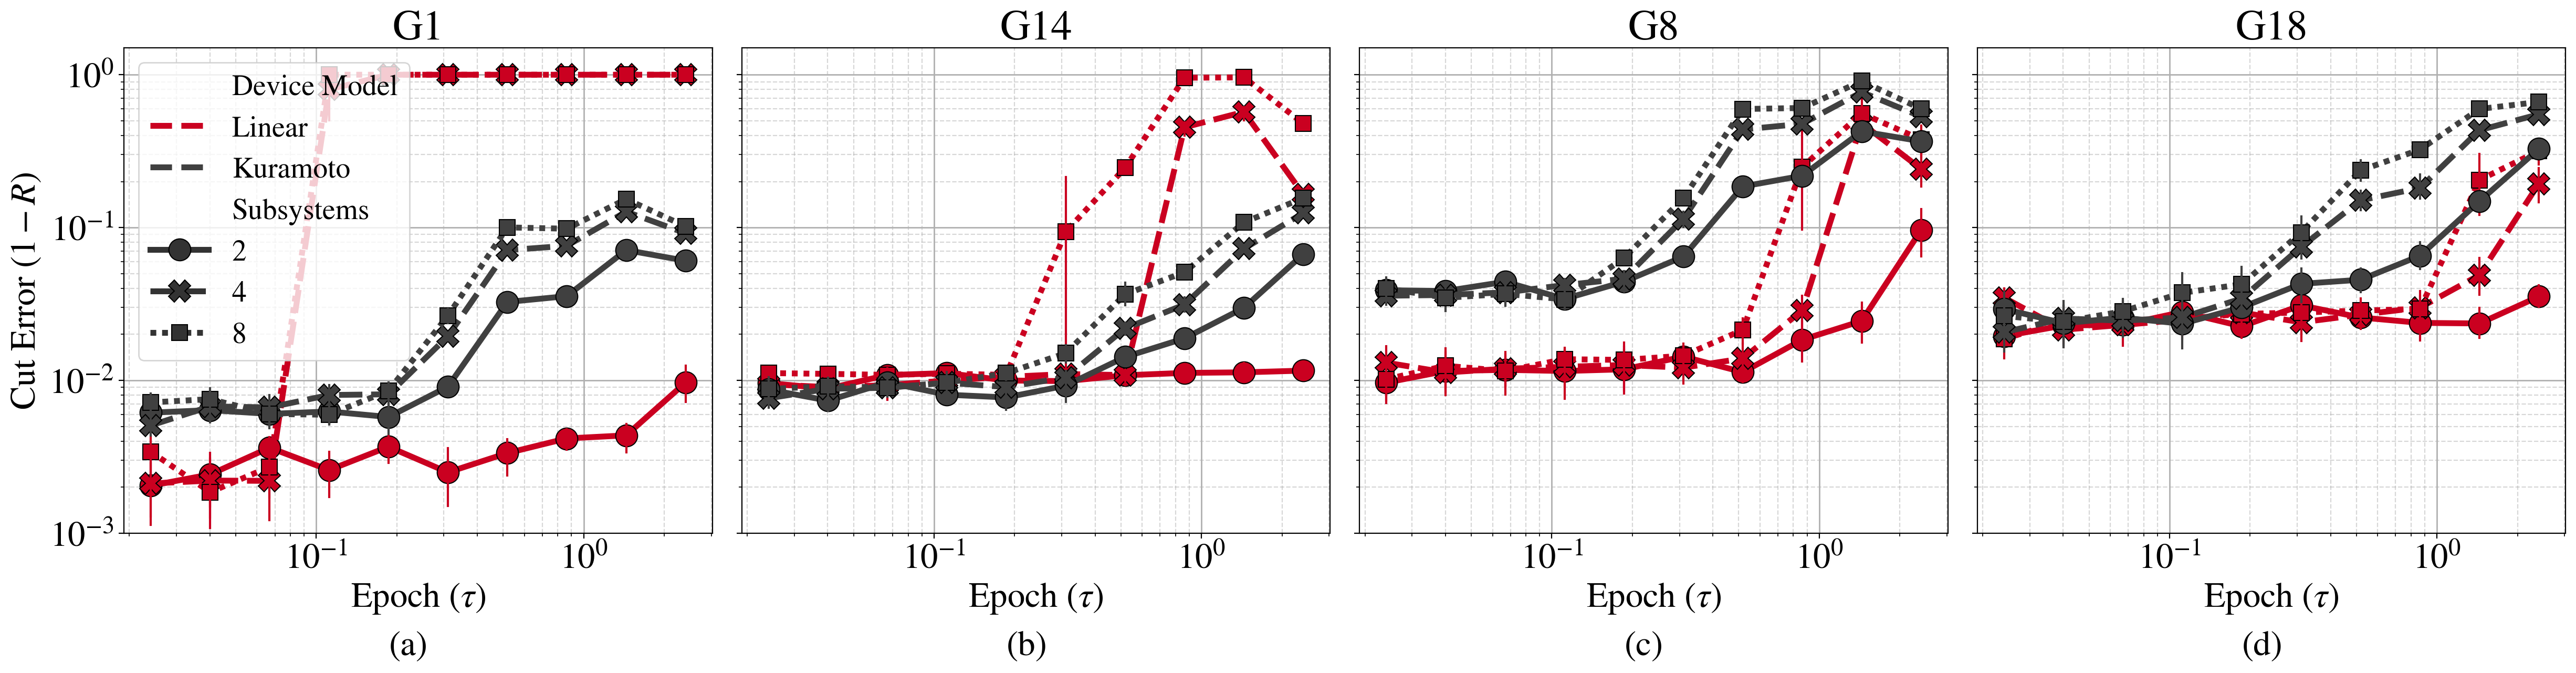

In [2]:

palette = [
    '#ca0020',
    # "#f4a582",
    # "#bababa",
    '#404040'
]
fig, axs = plt.subplots(figsize=(30,6), dpi=200, ncols=4, gridspec_kw={'wspace': 0.05})
# fig, ax = plt.subplots()
for ax, g, label in zip(axs, ['G001', 'G014', 'G008', 'G018'], ['a', 'b', 'c', 'd']):
    sns.lineplot(ax=ax, 
                palette=palette,
                data=df.query(f'graph == "{g}" and Precision == "Full"'), 
                x='Epoch ($\\tau$)', 
                y='InvR',
                hue='Device Model',
                style='Subsystems',
                markers=True,
                err_style='bars',
                linestyle='--',
                markeredgecolor='black',
                linewidth=4,
                markersize=15
                )
    # ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('Cut Error ($1-R$)')
    ax.set_title('{}'.format(g.replace('0', '')))
    ax.legend(fontsize=18)
    ax.set_ylim(1e-3, 1.5)
    ax.annotate(text=f"({label})", xy=(0.45, -0.25), xycoords='axes fraction')
    ax.grid(which='minor', linestyle='--', alpha=0.5)
    ax.grid(which='major', linewidth=1)

for ax in axs[1:]:
    ax.set_yticklabels(['' for i in ax.get_yticklabels()])
    ax.set_ylabel('')
    ax.legend_ = None
axs[0].legend(fontsize=20)
fig.savefig('../figures/linear_kur_comp_comparison.pdf', bbox_inches='tight', dpi=300)

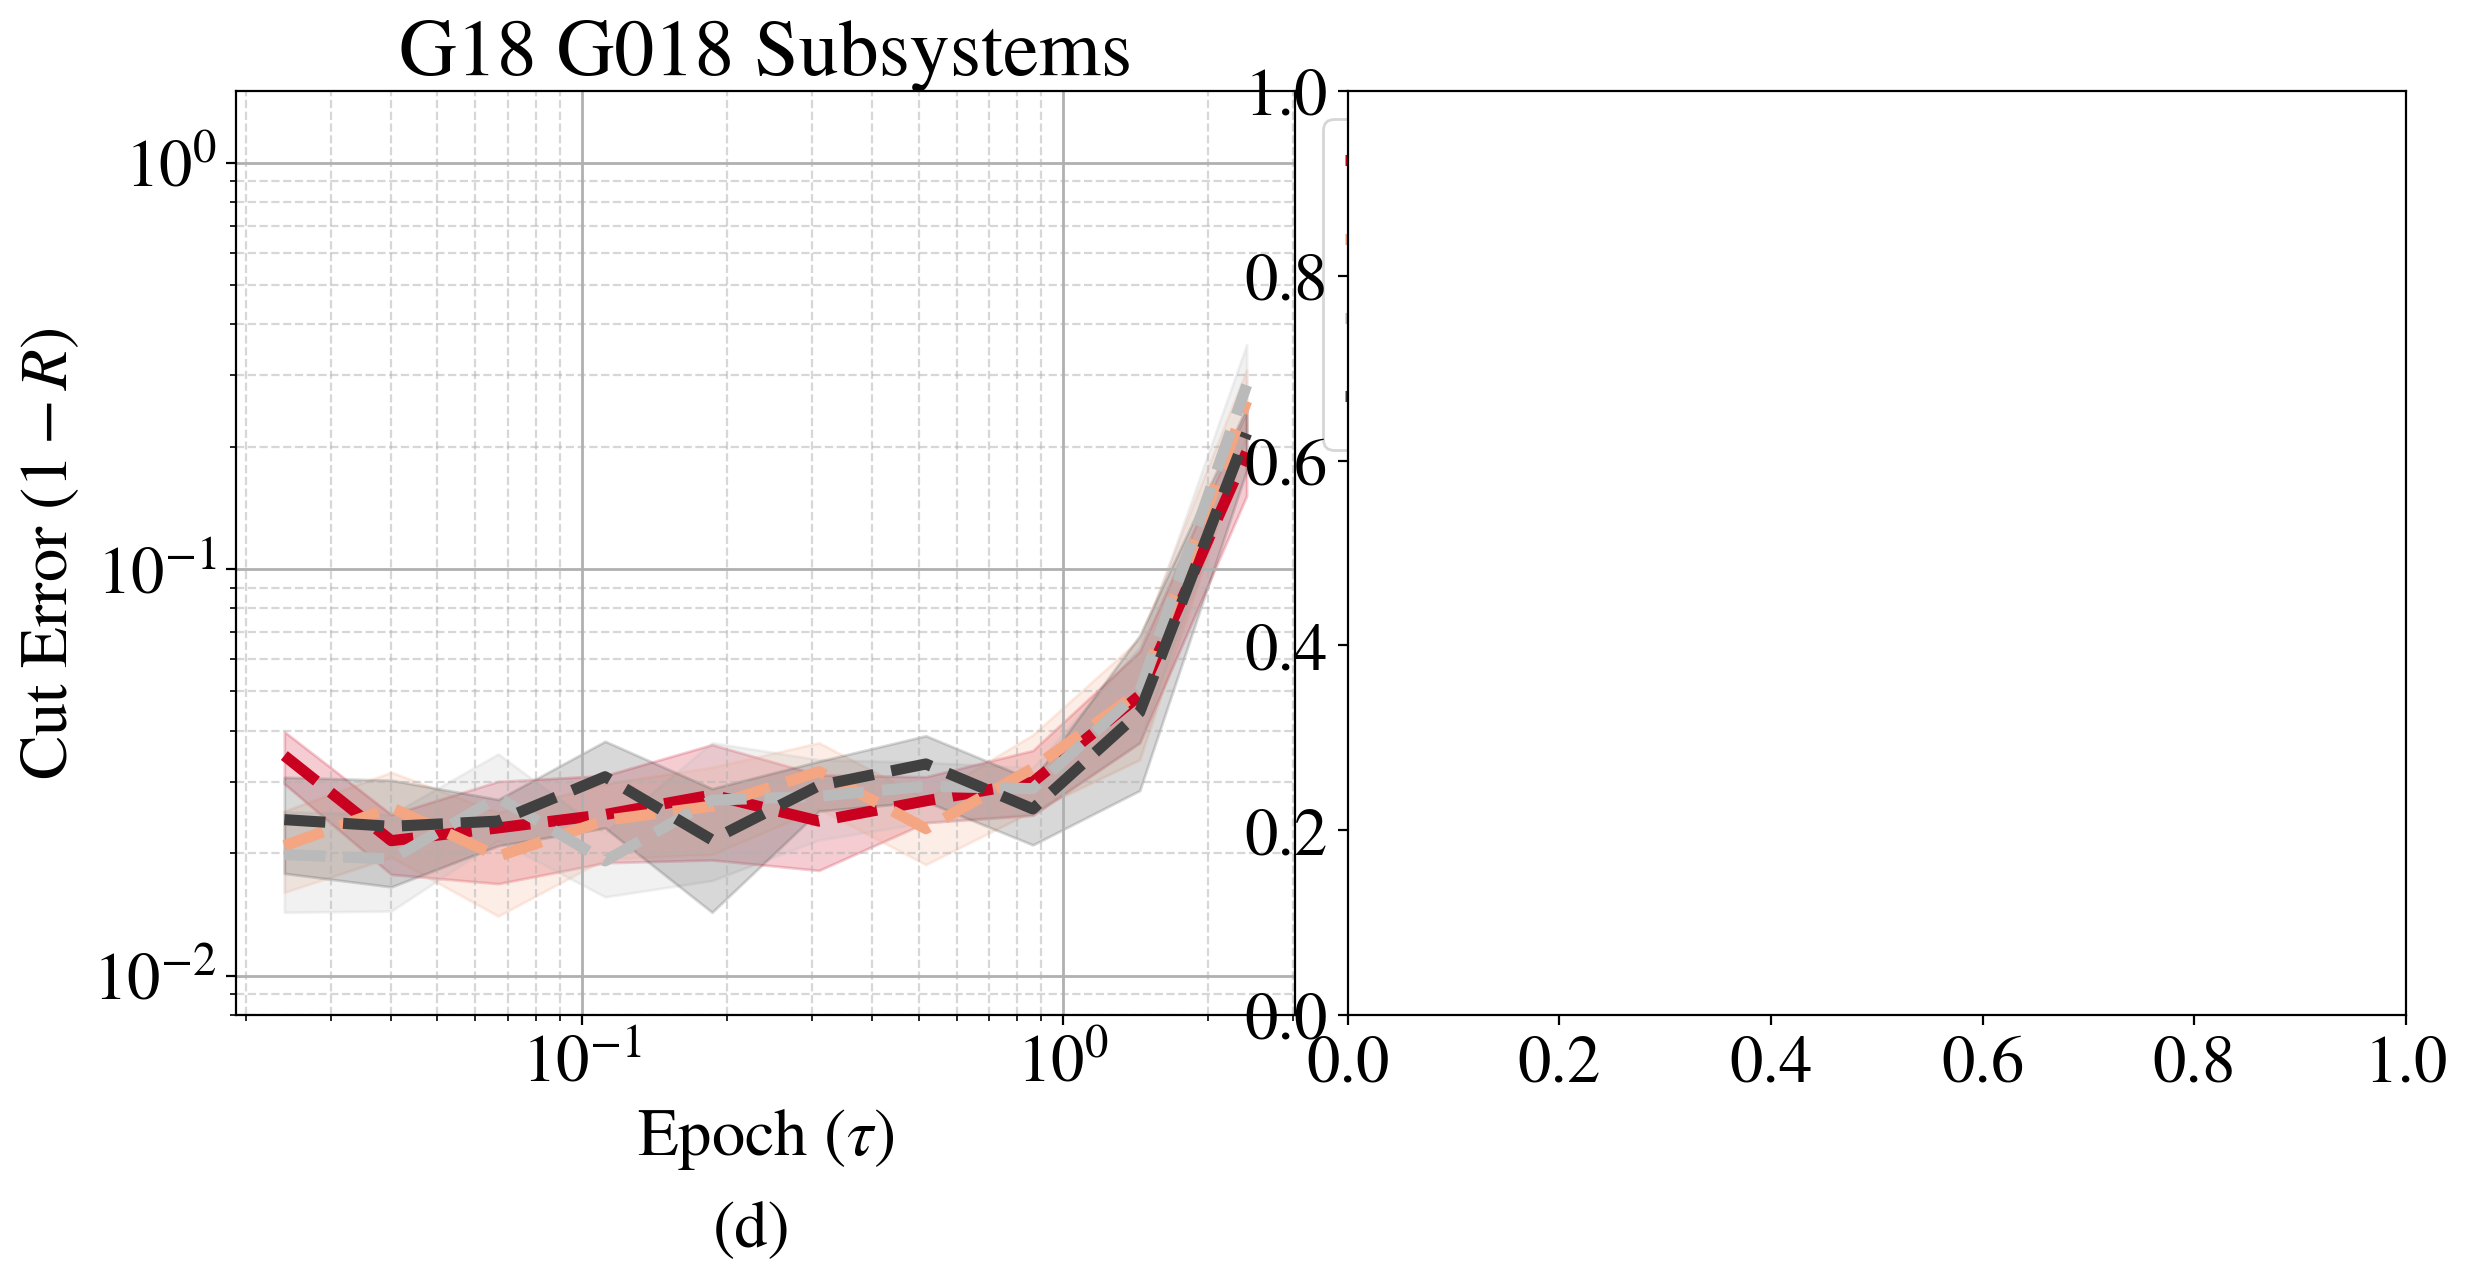

In [3]:

palette = [
    '#ca0020',
    "#f4a582",
    "#bababa",
    '#404040'
]
fig, axs = plt.subplots(figsize=(14,6), dpi=200, ncols=2, gridspec_kw={'wspace': 0.05})
ax = axs[0]
# fig, ax = plt.subplots()
sns.lineplot(ax=ax, 
            palette=palette,
            data=df.query(f'graph == "G018" and Subsystems == 4 and `Device Model` == "Linear"'), 
            x='Epoch ($\\tau$)', 
            y='InvR',
            hue='Precision',
            linestyle='--',
            markeredgecolor='black',
            linewidth=4,
            markersize=15
            )
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Cut Error ($1-R$)')
ax.set_title(f'G18 {g} Subsystems')
ax.legend(fontsize=18)
ax.set_ylim(8e-3, 1.5)
ax.annotate(text=f"({label})", xy=(0.45, -0.25), xycoords='axes fraction')
ax.grid(which='minor', linestyle='--', alpha=0.5)
ax.grid(which='major', linewidth=1)

ax.legend(fontsize=20, bbox_to_anchor=(1,1), loc='upper left')
fig.savefig('../figures/linear_kur_comp_quant_g18.pdf', bbox_inches='tight', dpi=300)

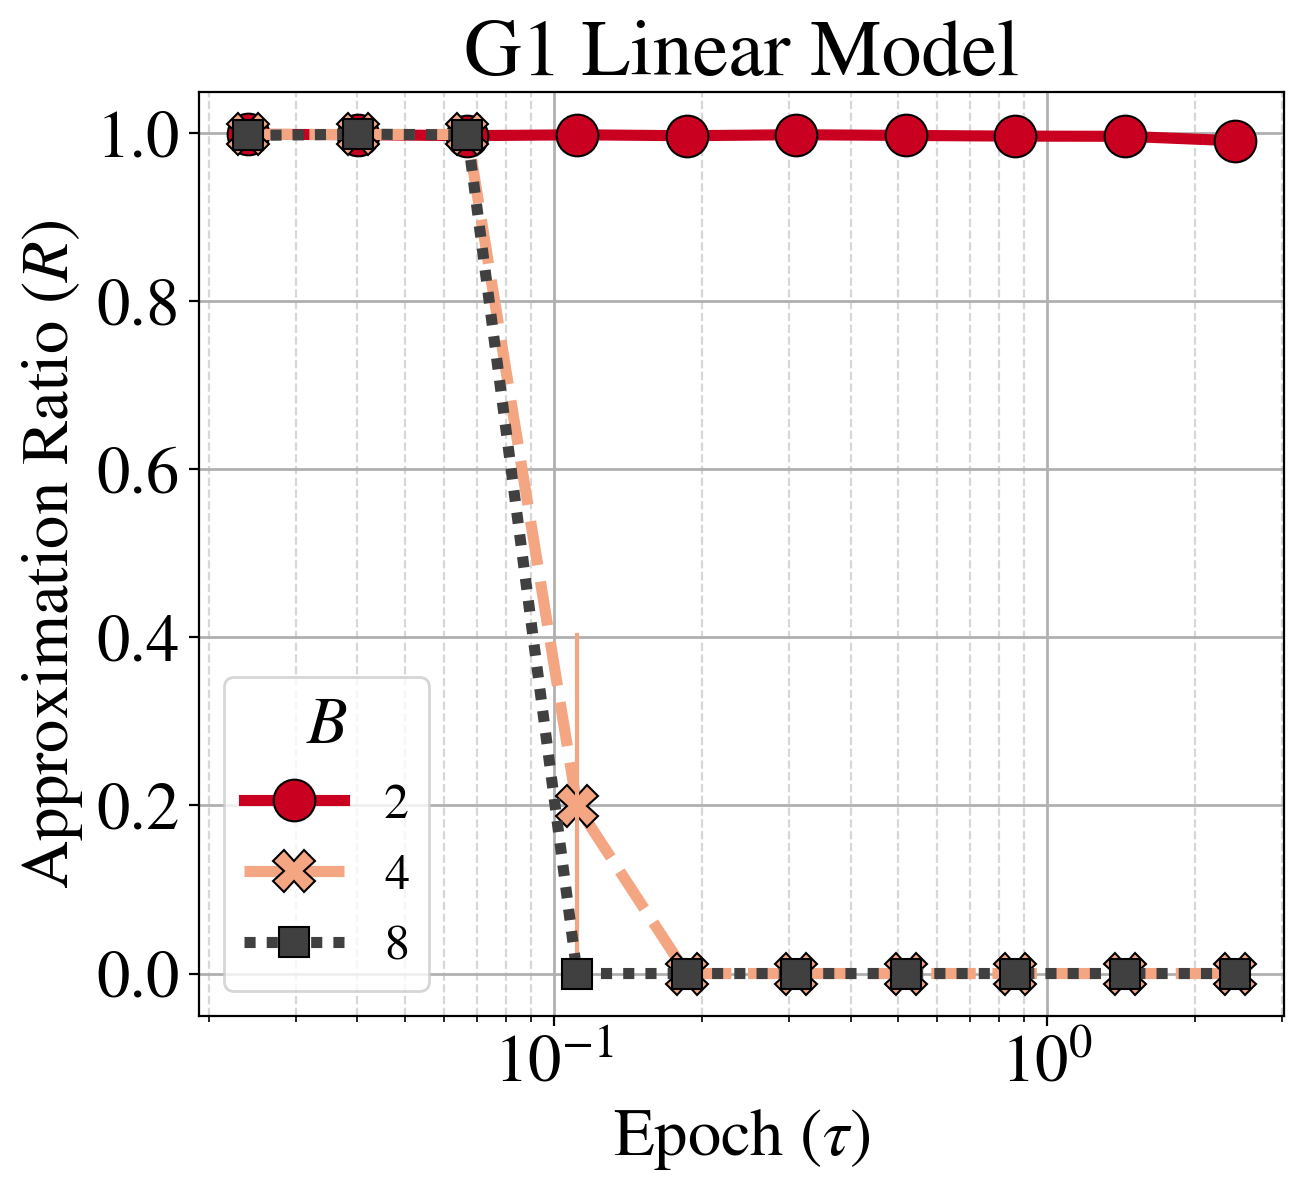

In [7]:

palette = [
    '#ca0020',
    "#f4a582",
    # "#bababa",
    '#404040'
]
fig, ax = plt.subplots(figsize=(7,6), dpi=200)
sns.lineplot(ax=ax, 
            palette=palette,
            data=df.query('graph == "G001" and Precision == "Full" and `Device Model` == "Linear"'), 
            x='Epoch ($\\tau$)', 
            y='R',
            hue='Subsystems',
            style='Subsystems',
            markers=True,
            err_style='bars',
            linestyle='--',
            markeredgecolor='black',
            linewidth=4,
            markersize=15
            )
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Approximation Ratio ($R$)')
ax.legend(fontsize=18, title='Subsystems')
# ax.set_ylabel('Cut Error (1-R)')
ax.grid(which='minor', linestyle='--', alpha=0.5)
ax.grid(which='major', linewidth=1)
ax.set_title('G1 Linear Model')
fig.savefig('../figures/g1_linear_diverge.pdf', bbox_inches='tight', dpi=300)

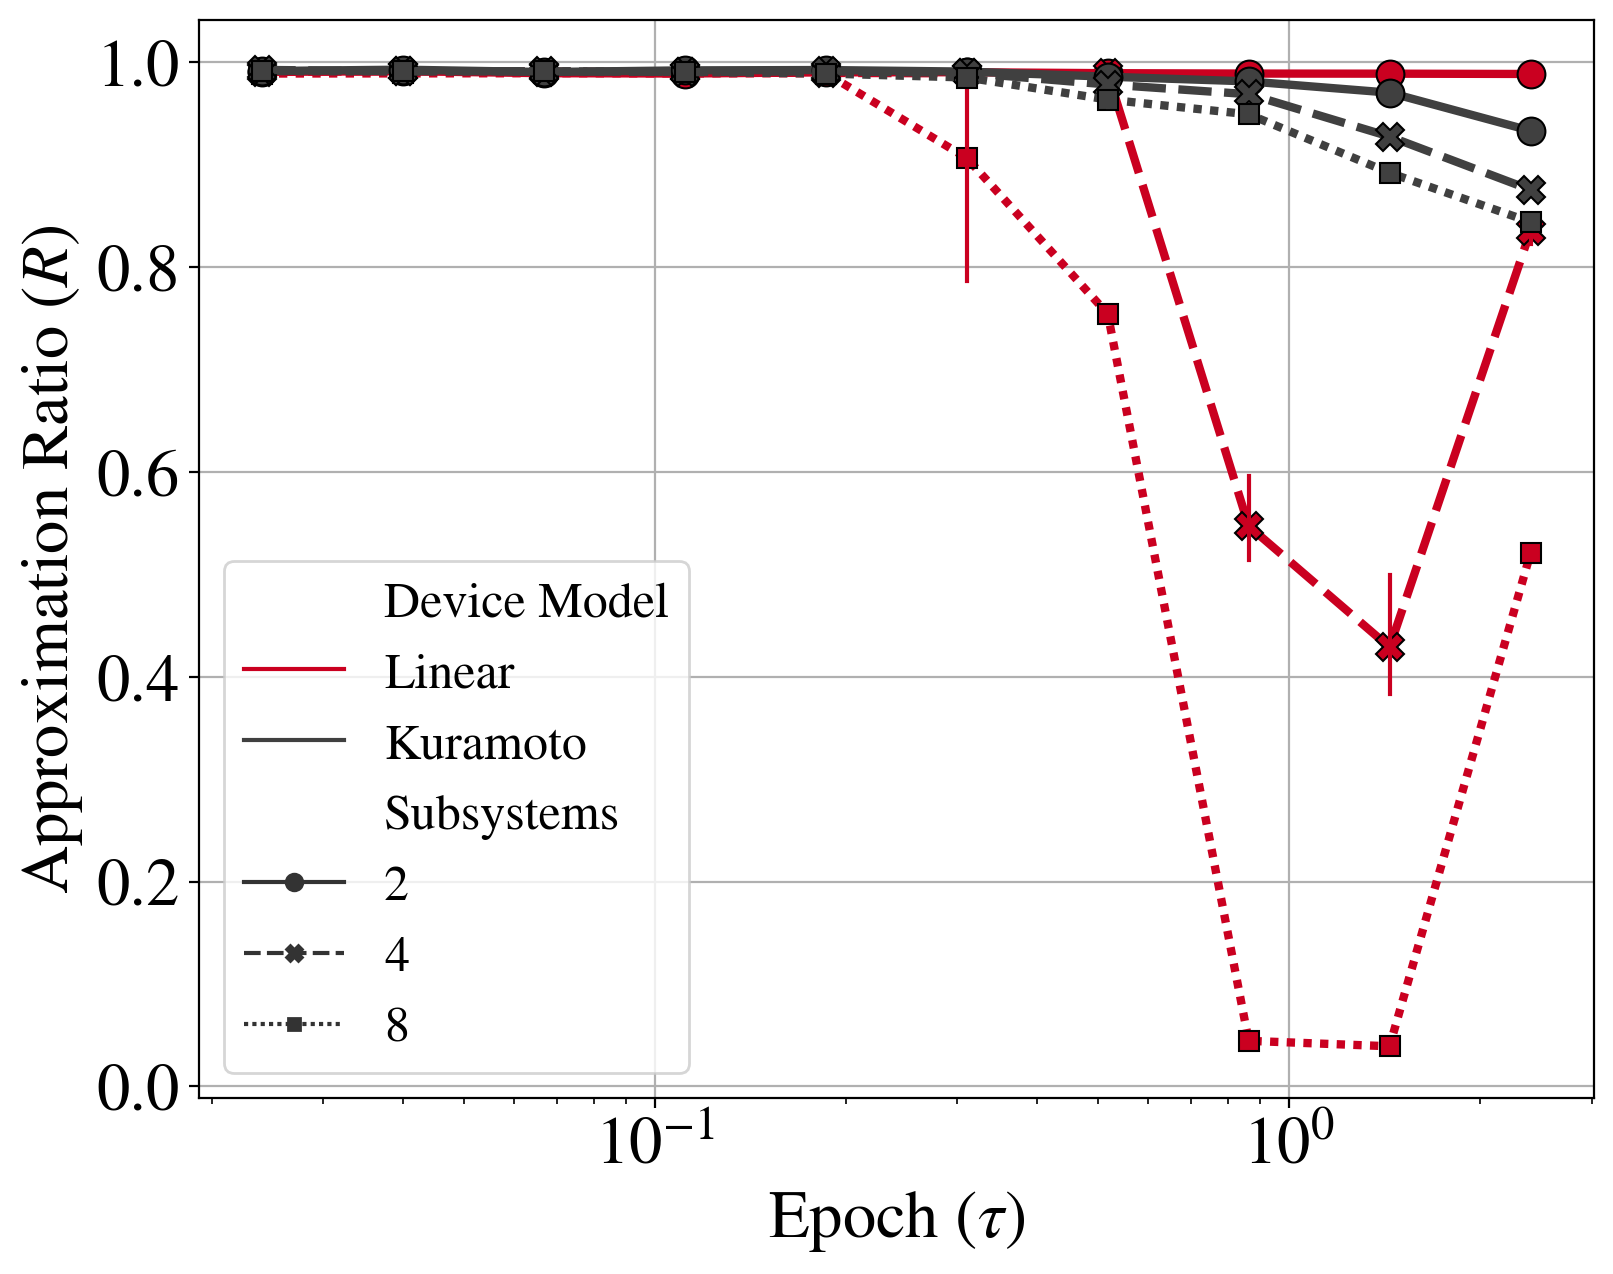

In [5]:

palette = [
    '#ca0020',
    # "#f4a582",
    # "#bababa",
    '#404040'
]
fig, ax = plt.subplots(figsize=(9,7), dpi=200)
sns.lineplot(ax=ax, 
            palette=palette,
            data=df.query('graph == "G014" and Precision == "Full"'), 
            x='Epoch ($\\tau$)', 
            y='R',
            hue='Device Model',
            style='Subsystems',
            markers=True,
            err_style='bars',
            linestyle='--',
            markeredgecolor='black',
            linewidth=3,
            markersize=10
            )
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Approximation Ratio ($R$)')
ax.legend(fontsize=18)
ax.grid()
fig.savefig('../figures/g14_comparison.pdf', bbox_inches='tight', dpi=300)

In [94]:
kdf['graph'].unique()

array(['G001', 'G008'], dtype=object)

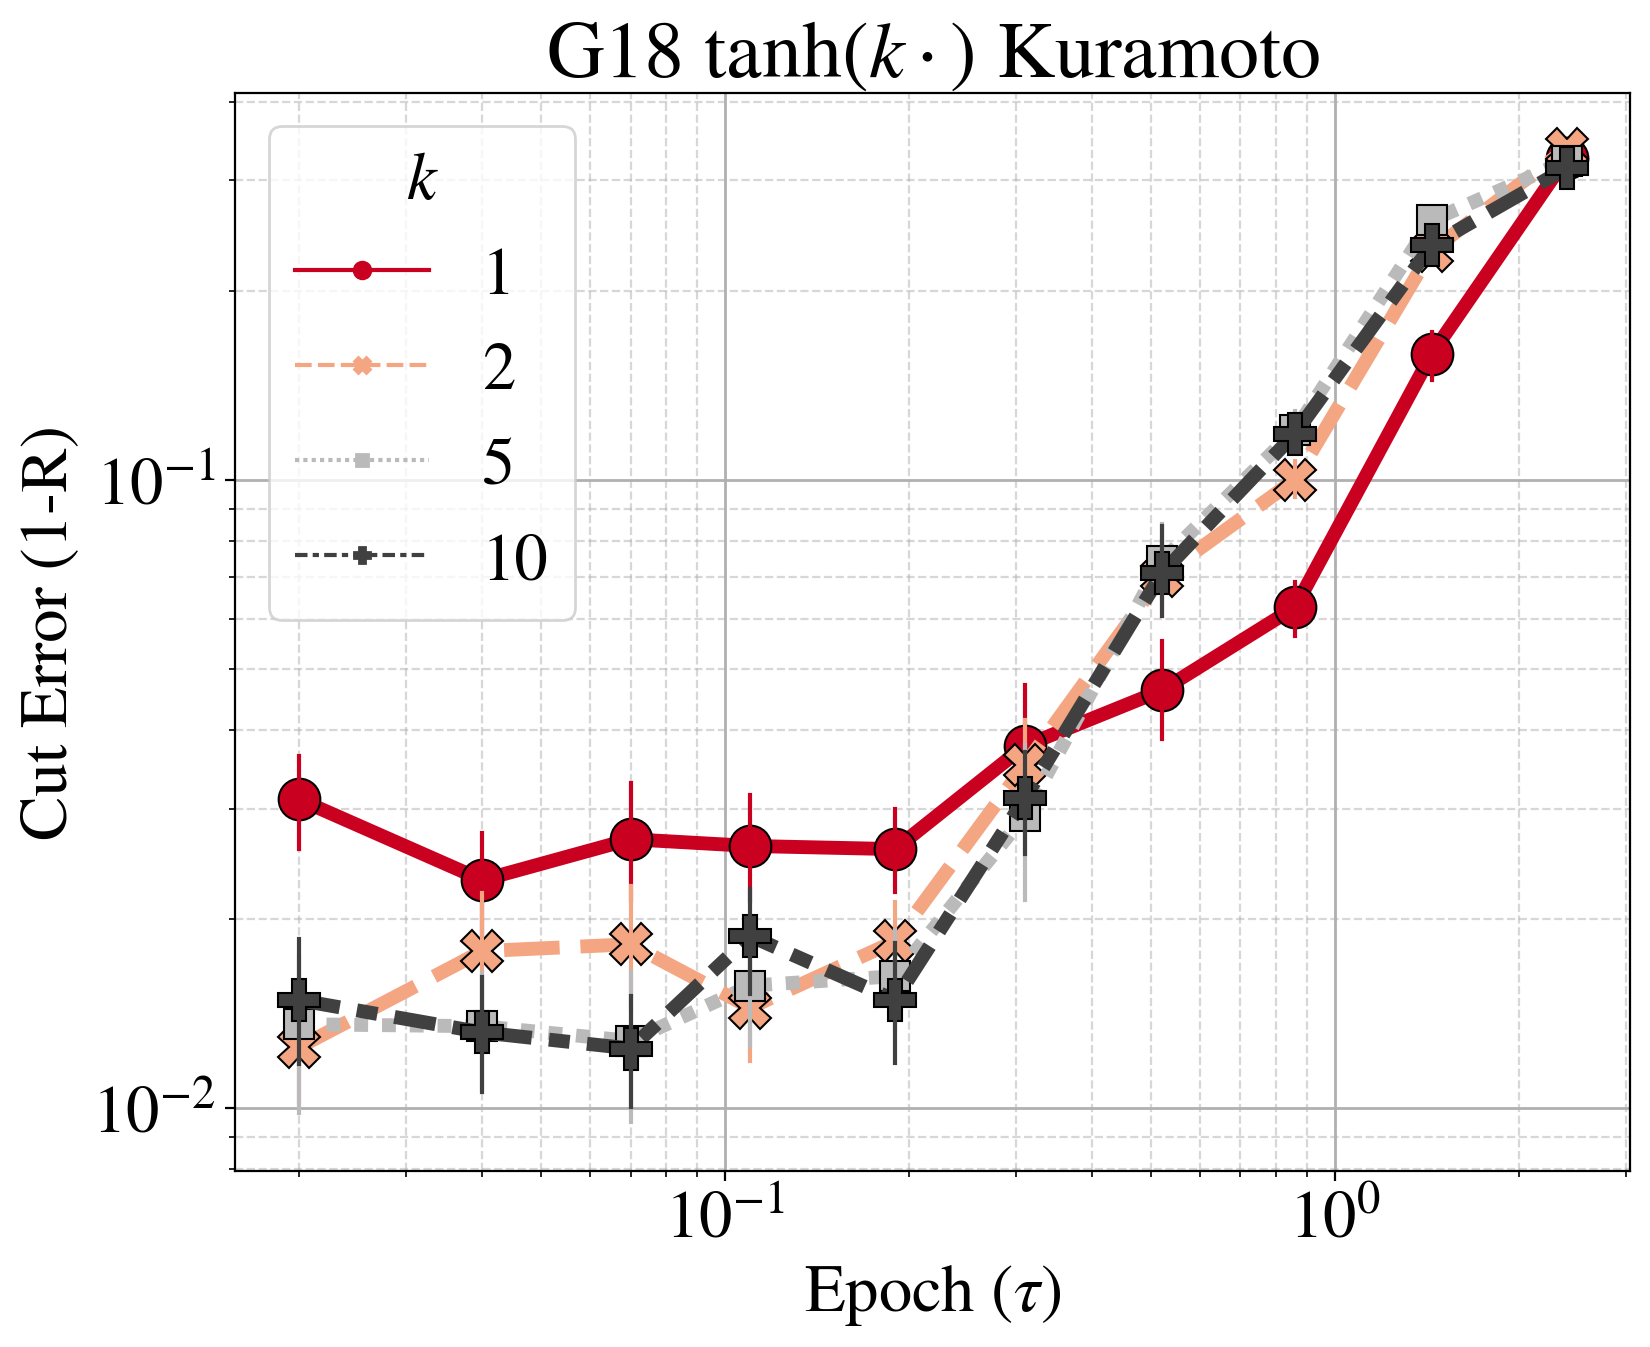

In [6]:
kdf = pd.read_csv('../kuramoto_linear_comparison_quantized_k10_g18.csv')
# kdf['Sync Frequency ($\\tau^{-1}$)'] = kdf['Epoch ($\\tau$)']
kdf['graph'] = kdf['graph'].str.extract(r'/([\w\d]+)$')
kdf['Precision'] = kdf['bits'].astype(str) + 'b'
kdf['Precision'] = kdf['Precision'].replace({'0b': "Full"})
kdf['solver'] = kdf['solver'].replace({'brim': "Linear", 'kuramoto': 'Kuramoto'})
# kdf['Epoch ($\\tau$)'] = kdf['epoch']
kdf = kdf.rename(columns={'epoch':"Epoch ($\\tau$)", 'cut':"Cut"})
bks_df = pd.read_csv(os.environ['GSET']+'/bks/set_summary.csv')
kdf = kdf.merge(bks_df, on='graph')
kdf['R'] = kdf['Cut'] / kdf['BKS']
kdf['InvR'] = 1-kdf['R']
kdf['Device Model'] = kdf['solver']
kdf['Subsystems'] = kdf['blocks']
# for graph, lim_df in kdf.groupby('graph'):
#     for 

palette = [
    '#ca0020',
    "#f4a582",
    "#bababa",
    '#404040'
]
kdf['BKS'] = 992
kdf['$k$'] = kdf['k']
kdf['Epoch ($\\tau$)'] = np.round(kdf['Epoch ($\\tau$)'], decimals=2)
fig, ax = plt.subplots(figsize=(9,7), dpi=200)
sns.lineplot(ax=ax, 
            palette=palette,
            data=kdf.query('Subsystems == 2'), 
            x='Epoch ($\\tau$)', 
            y='InvR',
            hue='$k$',
            # log_scale=False,
            # dodge=True
            style='$k$',
            markers=True,
            err_style='bars',
            linestyle='--',
            markeredgecolor='black',
            linewidth=5,
            markersize=15
            )
# ax.grid(True)
ax.set_ylabel('Cut Error (1-R)')
# ax.set_ylabel('Cut Error (1-R)')
ax.grid(which='minor', linestyle='--', alpha=0.5)
ax.grid(which='major', linewidth=1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('G18 $\\tanh(k\\cdot)$ Kuramoto')
plt.show()
fig.savefig('../figures/k_comparison.pdf', bbox_inches='tight', dpi=300)

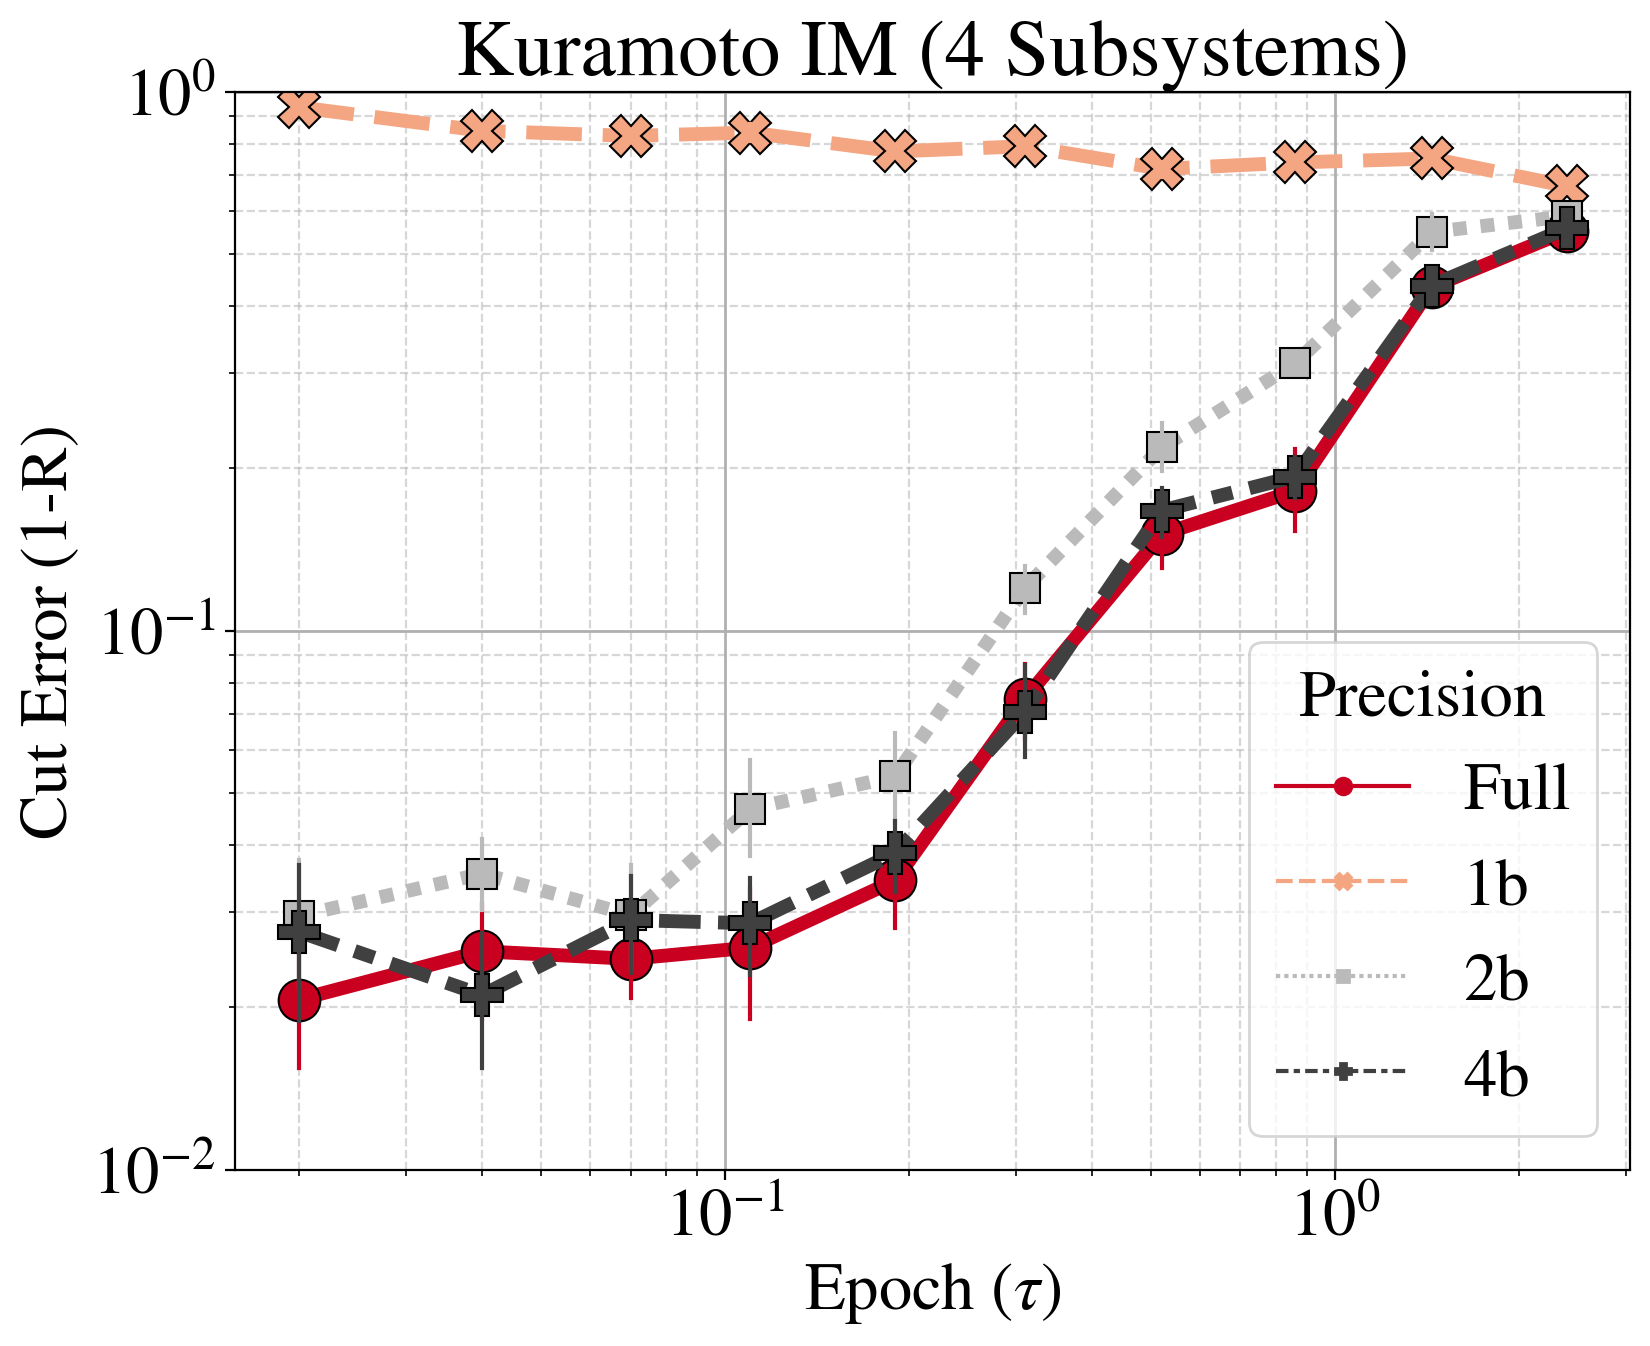

In [30]:
kdf = pd.read_csv('../kuramoto_linear_comparison_quantized.csv')
# kdf['Sync Frequency ($\\tau^{-1}$)'] = kdf['Epoch ($\\tau$)']
kdf['graph'] = kdf['graph'].str.extract(r'/([\w\d]+)$')
kdf['Precision'] = kdf['bits'].astype(str) + 'b'
kdf['Precision'] = kdf['Precision'].replace({'0b': "Full"})
kdf['solver'] = kdf['solver'].replace({'brim': "Linear", 'kuramoto': 'Kuramoto'})
# kdf['Epoch ($\\tau$)'] = kdf['epoch']
kdf = kdf.rename(columns={'epoch':"Epoch ($\\tau$)", 'cut':"Cut"})
bks_df = pd.read_csv(os.environ['GSET']+'/bks/set_summary.csv')
kdf = kdf.merge(bks_df, on='graph')
kdf['R'] = kdf['Cut'] / kdf['BKS']
kdf['InvR'] = 1-kdf['R']
kdf['Device Model'] = kdf['solver']
kdf['Subsystems'] = kdf['blocks']
# for graph, lim_df in kdf.groupby('graph'):
#     for 

palette = [
    '#ca0020',
    "#f4a582",
    "#bababa",
    '#404040'
]
kdf['BKS'] = 992
# kdf['$k$'] = kdf['k']
kdf['Epoch ($\\tau$)'] = np.round(kdf['Epoch ($\\tau$)'], decimals=2)
fig, ax = plt.subplots(figsize=(9,7), dpi=200)
sns.lineplot(ax=ax, 
            palette=palette,
            data=kdf.query('solver == "Kuramoto" and Subsystems == 4 and graph == "G018"'), 
            x='Epoch ($\\tau$)', 
            y='InvR',
            hue='Precision',
            # log_scale=False,
            # dodge=True
            style='Precision',
            markers=True,
            err_style='bars',
            linestyle='--',
            markeredgecolor='black',
            linewidth=5,
            markersize=15
            )
# ax.grid(True)
ax.set_ylabel('Cut Error (1-R)')
# ax.set_ylabel('Cut Error (1-R)')
ax.grid(which='minor', linestyle='--', alpha=0.5)
ax.grid(which='major', linewidth=1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Kuramoto IM (4 Subsystems)')
ax.set_ylim(1e-2, 1)
plt.show()
fig.savefig('../figures/kuramoto_quantized.pdf', bbox_inches='tight', dpi=300)

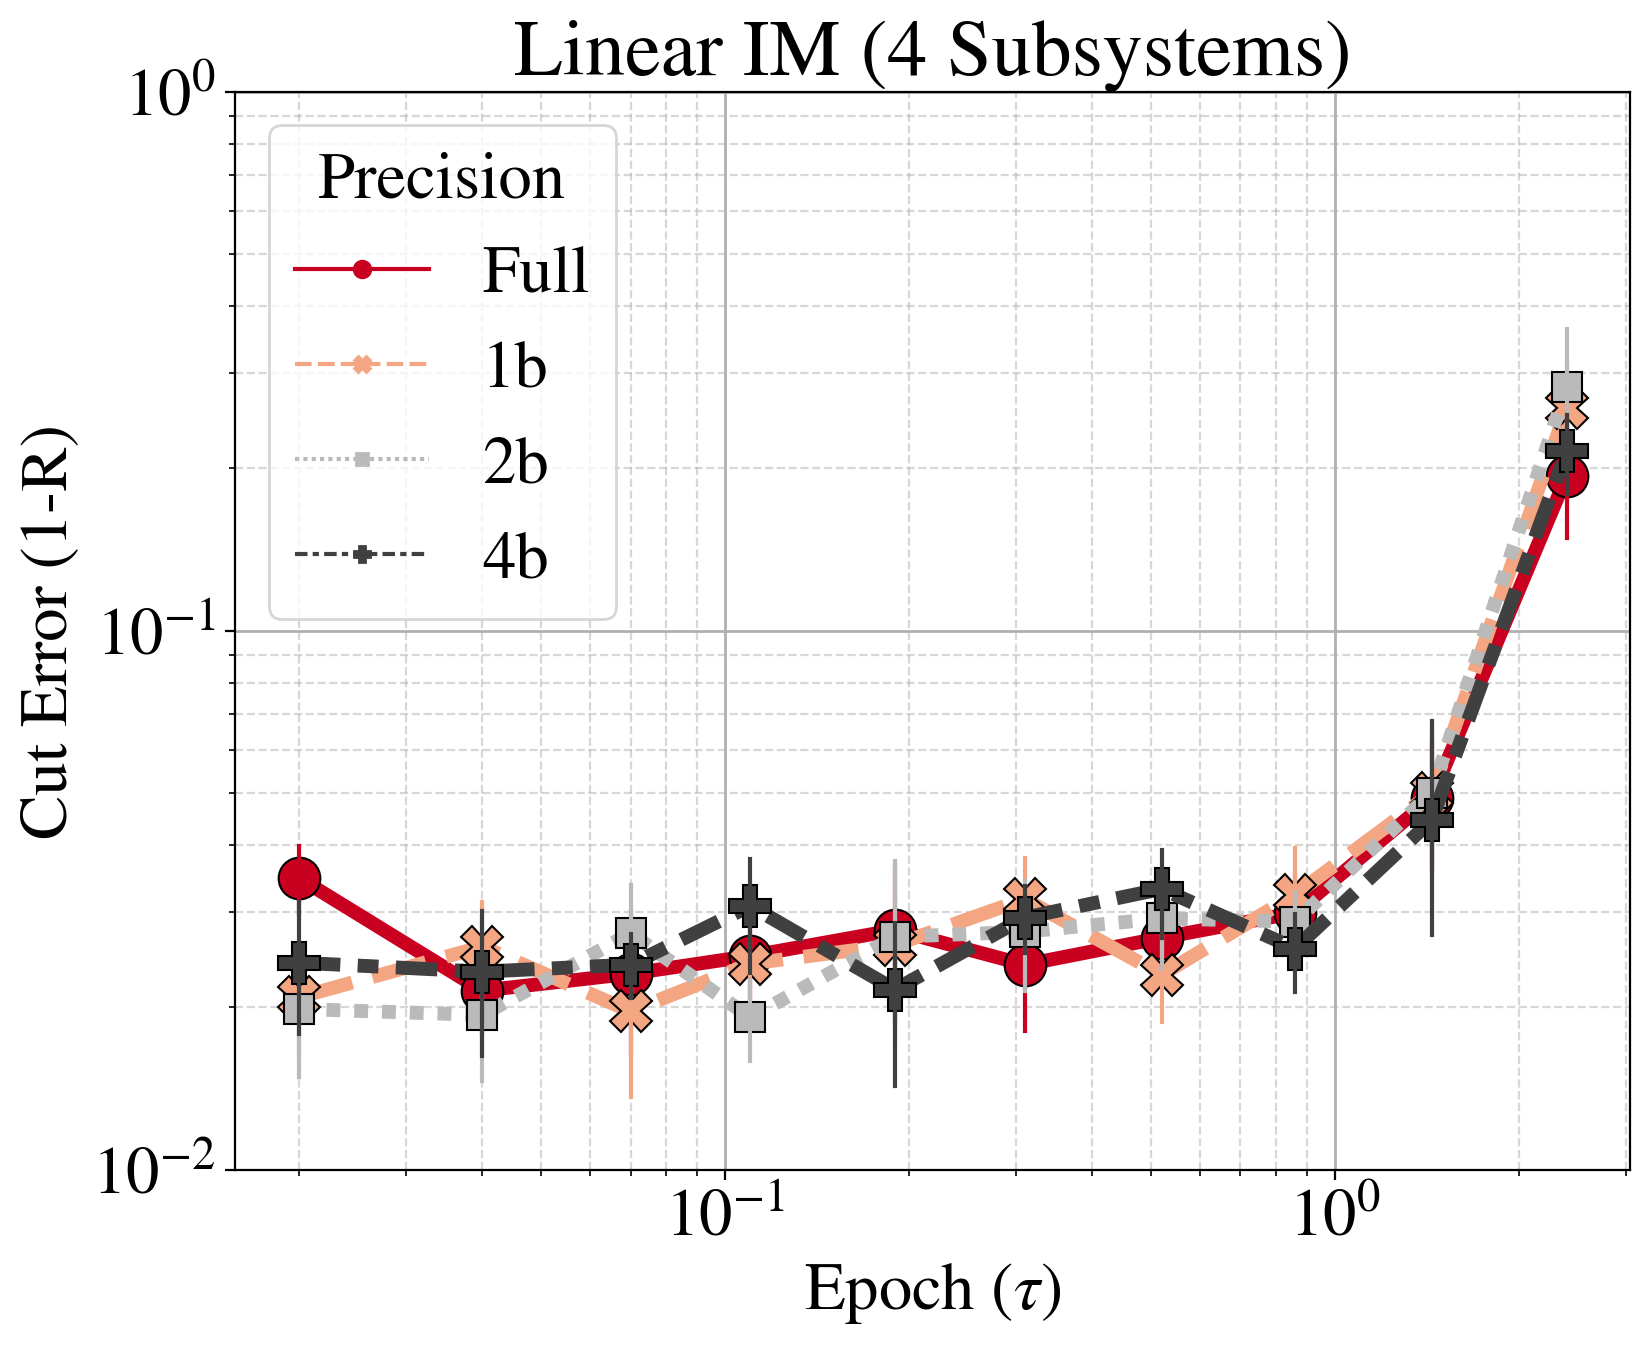

In [29]:
kdf = pd.read_csv('../kuramoto_linear_comparison_quantized.csv')
# kdf['Sync Frequency ($\\tau^{-1}$)'] = kdf['Epoch ($\\tau$)']
kdf['graph'] = kdf['graph'].str.extract(r'/([\w\d]+)$')
kdf['Precision'] = kdf['bits'].astype(str) + 'b'
kdf['Precision'] = kdf['Precision'].replace({'0b': "Full"})
kdf['solver'] = kdf['solver'].replace({'brim': "Linear", 'kuramoto': 'Kuramoto'})
# kdf['Epoch ($\\tau$)'] = kdf['epoch']
kdf = kdf.rename(columns={'epoch':"Epoch ($\\tau$)", 'cut':"Cut"})
bks_df = pd.read_csv(os.environ['GSET']+'/bks/set_summary.csv')
kdf = kdf.merge(bks_df, on='graph')
kdf['R'] = kdf['Cut'] / kdf['BKS']
kdf['InvR'] = 1-kdf['R']
kdf['Device Model'] = kdf['solver']
kdf['Subsystems'] = kdf['blocks']
# for graph, lim_df in kdf.groupby('graph'):
#     for 

palette = [
    '#ca0020',
    "#f4a582",
    "#bababa",
    '#404040'
]
kdf['BKS'] = 992
# kdf['$k$'] = kdf['k']
kdf['Epoch ($\\tau$)'] = np.round(kdf['Epoch ($\\tau$)'], decimals=2)
fig, ax = plt.subplots(figsize=(9,7), dpi=200)
sns.lineplot(ax=ax, 
            palette=palette,
            data=kdf.query('solver == "Linear" and Subsystems == 4 and graph == "G018"'), 
            x='Epoch ($\\tau$)', 
            y='InvR',
            hue='Precision',
            # log_scale=False,
            # dodge=True
            style='Precision',
            markers=True,
            err_style='bars',
            linestyle='--',
            markeredgecolor='black',
            linewidth=5,
            markersize=15
            )
# ax.grid(True)
ax.set_ylabel('Cut Error (1-R)')
# ax.set_ylabel('Cut Error (1-R)')
ax.grid(which='minor', linestyle='--', alpha=0.5)
ax.grid(which='major', linewidth=1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-2, 1)
ax.set_title('Linear IM (4 Subsystems)')
plt.show()
fig.savefig('../figures/linear_quantized.pdf', bbox_inches='tight', dpi=300)